# Tarefa 1: determinar significado de colunas no dataset do projeto final

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
my_range = [91, 181]

In [5]:
# Importing libs
import pandas as pd
import seaborn as sns
import numpy as np
import json
import missingno as msno
from jinja2 import Template

from IPython.display import display, Markdown

## GAMEPLAN

- Automatizar a criação de um documentinho com as informações que eu julgar necessário com minha análise, contando com as informações do dict
- Ler os documentinhos e escrever o relatório
- Talvez automatizar isso ai também.

In [6]:
with open('dict.json') as f:
    vars_dict = json.load(f)

In [7]:
# Loading data frame
entire_df = pd.read_csv('../estaticos_market.csv', index_col=0)

# Slicing my part
my_df = entire_df.iloc[:, my_range[0]:my_range[1]]

In [8]:
my_df.shape

(462298, 90)

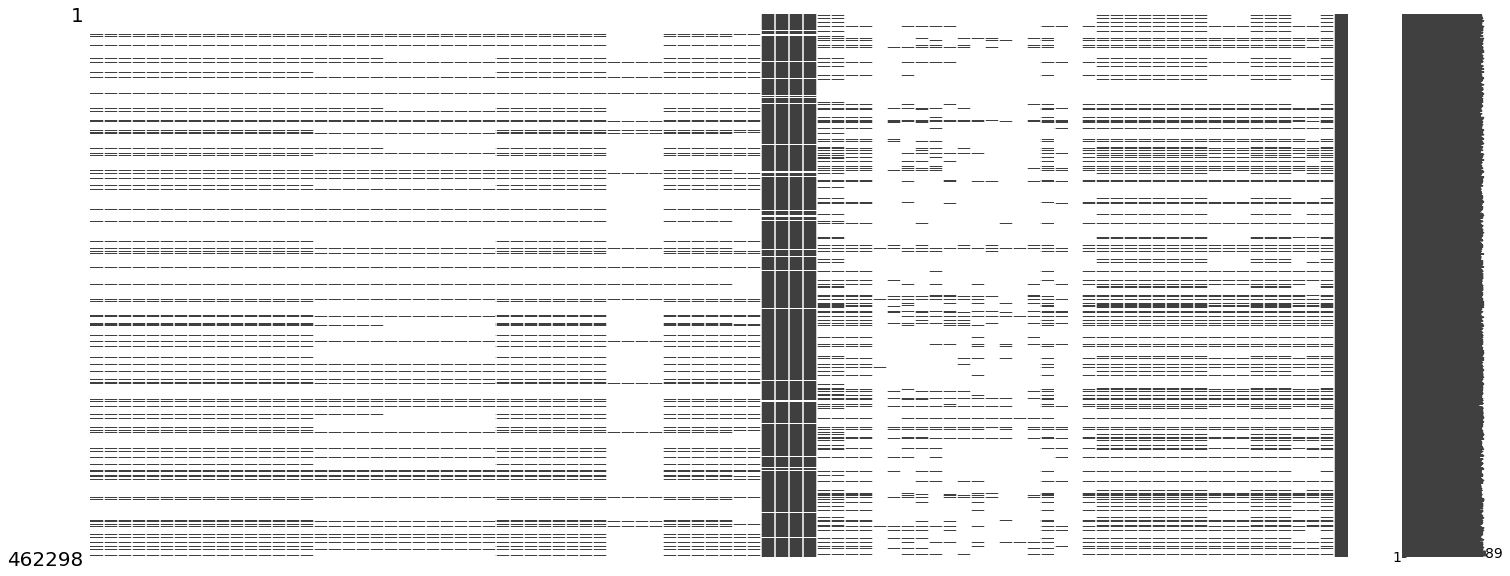

In [13]:
msno.matrix(my_df)

In [9]:
string_template = '''
-----
# Analysis of {{ COL_NAME }}

### Type of column: {{ COL_TYPE }}

Description: {{ COL_DESCRIPTION }}

{% if FLOAT_TYPE %}

* Average value: {{ AVG }}
* Mode value: {{ MODE }}
* Q2: {{ Q2 }}
* Variance: {{ VAR }}

{% else %}

* Value counts

{% for key in VALUE_COUNTS %}
    * {{key }} : {{ VALUE_COUNTS[key] }}
{% endfor %}
{% endif %}

### NaN %: {{ NAN_PCTG }}%
#### NaN count: {{ NAN_COUNT }}
'''

In [10]:
tm = Template(string_template)

for name in my_df:
    tm = Template(string_template)
    info = dict()
    info['COL_NAME'] = name
    info['COL_TYPE'] = my_df[name].dtype
    info['COL_DESCRIPTION'] = vars_dict[name]
        
        
    info['NAN_PCTG'] = round(100*my_df[name].isna().sum()/my_df[name].size, 2)
    info['NAN_COUNT'] = my_df[name].isna().sum()
    
    if np.issubsctype(my_df[name].dtype, float) or np.issubsctype(my_df[name].dtype, int):
        info['FLOAT_TYPE'] = True
        info['AVG'] = my_df[name].mean()
        info['VAR'] = my_df[name].var()
        info['MODE'] = my_df[name].mode()
        info['Q2'] = round(my_df[name].median(), 3)
    
    else:
        info['FLOAT_TYPE'] = False
        info['VALUE_COUNTS'] = dict()
        counts = my_df[name].value_counts()
        for key in counts.index:
            info['VALUE_COUNTS'][key] = counts.loc[key]

    display(Markdown(tm.render(info)))


-----
# Analysis of qt_coligados_ltda

### Type of column: float64

Description: integer value, quantity of connected companies that has the term  LTDA in the end of the business name



* Average value: 0.08022510743068618
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.46626608176202194



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_epp

### Type of column: float64

Description: integer value, quantity of connected companies that has the term EPP in the end of the business name



* Average value: 0.001789237050970317
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0026424630565076673



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_norte

### Type of column: float64

Description: integer value, quantity of connected companies that are located in the north region of the country



* Average value: 0.9122509213806181
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 10.486289888161524



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_sul

### Type of column: float64

Description: integer value, quantity of connected companies that are located in the south region of the country



* Average value: 0.1361196494930495
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 1.673916485699073



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_nordeste

### Type of column: float64

Description: integer value, quantity of connected companies that are located in the northeast region of the country



* Average value: 2.2443761373889375
* Mode value: 0    0.0
dtype: float64
* Q2: 1.0
* Variance: 51.789063607960315



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_centro

### Type of column: float64

Description: integer value, quantity of connected companies that are located in the center-west (centro-oeste) region of the country



* Average value: 0.23923781560153537
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 4.378916709171579



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_sudeste

### Type of column: float64

Description: integer value, quantity of connected companies that are located in the southeast of the country



* Average value: 2.3684299062562126
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 448.2838016011388



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_exterior

### Type of column: float64

Description: integer value, quantity of connected companies that are located abroad the country



* Average value: 0.015843158844489304
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.027459649601423903



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_ufs_coligados

### Type of column: float64

Description: integer value, quantity of distinct states where the connected companies are located



* Average value: 1.4561789848755946
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 1.9556840630243308



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_regioes_coligados

### Type of column: float64

Description: integer value, quantity of distinct ufs where the connected companies are located



* Average value: 1.2250003823156093
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 0.4109278081509472



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_ramos_coligados

### Type of column: float64

Description: integer value, quantity of distinct economic branches from connected companies



* Average value: 2.8773225673257787
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 20.020796477062053



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_industria

### Type of column: float64

Description: integer value, quantity of connected companies from the industry sector



* Average value: 0.5298435564527229
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 24.044464142828915



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_agropecuaria

### Type of column: float64

Description: integer value, quantity of connected companies from the agrobusiness sector



* Average value: 0.12974262513189888
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.648803541342422



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_comercio

### Type of column: float64

Description: integer value, quantity of connected companies



* Average value: 1.1698398862228747
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 30.181461358366857



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_serviço

### Type of column: float64

Description: integer value, quantity of connected companies from the service sector



* Average value: 2.91823033750822
* Mode value: 0    0.0
dtype: float64
* Q2: 1.0
* Variance: 124.46924266118147



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_ccivil

### Type of column: float64

Description: integer value, quantity of connected companies from the construction sector



* Average value: 1.205731675612852
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 317.4936732186571



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_funcionarios_coligados

### Type of column: float64

Description: integer value, quantity of employees from the connected companies



* Average value: 309.21634399451574
* Mode value: 0    0.0
dtype: float64
* Q2: 9.0
* Variance: 2231770.0208032657



### NaN %: 90.85%
#### NaN count: 419995


-----
# Analysis of qt_funcionarios_coligados_gp

### Type of column: float64

Description: integer value, quantity of employees from conected companies and their subsidiaries



* Average value: 1940.2744486206652
* Mode value: 0    0.0
dtype: float64
* Q2: 10.0
* Variance: 771962791.9888339



### NaN %: 90.85%
#### NaN count: 419995


-----
# Analysis of media_funcionarios_coligados_gp

### Type of column: float64

Description: numeric value, average of employees from the connected companies and their subsidiaries



* Average value: 364.9553036311657
* Mode value: 0    0.0
dtype: float64
* Q2: 6.0
* Variance: 346913210.505765



### NaN %: 90.85%
#### NaN count: 419995


-----
# Analysis of max_funcionarios_coligados_gp

### Type of column: float64

Description: numeric value, maximum number of employees from connected companies and their subsidiaries



* Average value: 1538.0433538992506
* Mode value: 0    0.0
dtype: float64
* Q2: 8.0
* Variance: 711889805.4665616



### NaN %: 90.85%
#### NaN count: 419995


-----
# Analysis of min_funcionarios_coligados_gp

### Type of column: float64

Description: numeric value, minimum number of employees from connected companies and their subsidiaries



* Average value: 155.2228447155048
* Mode value: 0    0.0
dtype: float64
* Q2: 1.0
* Variance: 336854839.2888809



### NaN %: 90.85%
#### NaN count: 419995


-----
# Analysis of vl_folha_coligados

### Type of column: float64

Description: numeric value, sum of payroll value from connected companies



* Average value: 45284172.192583695
* Mode value: 0    61819.199219
dtype: float64
* Q2: 803649.62
* Variance: 5.996166175199219e+16



### NaN %: 92.14%
#### NaN count: 425984


-----
# Analysis of media_vl_folha_coligados

### Type of column: float64

Description: numeric value, average of payroll value from connected companies



* Average value: 5863274.672376876
* Mode value: 0    61819.199219
dtype: float64
* Q2: 484250.391
* Variance: 1116219208232212.5



### NaN %: 92.14%
#### NaN count: 425984


-----
# Analysis of max_vl_folha_coligados

### Type of column: float64

Description: numeric value, maximum of payroll value from connected companies



* Average value: 22582083.573048964
* Mode value: 0    61819.2
dtype: float64
* Q2: 618192.0
* Variance: 1.6892688186938332e+16



### NaN %: 92.14%
#### NaN count: 425984


-----
# Analysis of min_vl_folha_coligados

### Type of column: float64

Description: numeric value, minimum of payroll value from connected companies



* Average value: 2261567.42508399
* Mode value: 0    61819.2
dtype: float64
* Q2: 185457.6
* Variance: 799963743786589.8



### NaN %: 92.14%
#### NaN count: 425984


-----
# Analysis of vl_folha_coligados_gp

### Type of column: float64

Description: numeric value, sum of payroll value from connected companies and their subsidiaries



* Average value: 114484765.34699419
* Mode value: 0    61819.199219
dtype: float64
* Q2: 927288.012
* Variance: 6.817616639926707e+17



### NaN %: 92.1%
#### NaN count: 425761


-----
# Analysis of media_vl_folha_coligados_gp

### Type of column: float64

Description: numeric value, average of payroll value from connected companies and their subsidiaries



* Average value: 15804829.971929519
* Mode value: 0    61819.199219
dtype: float64
* Q2: 539200.806
* Variance: 4.647617843886288e+16



### NaN %: 92.1%
#### NaN count: 425761


-----
# Analysis of max_vl_folha_coligados_gp

### Type of column: float64

Description: numeric value, maximum of payroll value from connected companies and their subsidiaries



* Average value: 67084852.15787285
* Mode value: 0    61819.2
dtype: float64
* Q2: 700617.6
* Variance: 4.688306784518568e+17



### NaN %: 92.1%
#### NaN count: 425761


-----
# Analysis of min_vl_folha_coligados_gp

### Type of column: float64

Description: numeric value, minimum of payroll value from connected companies and their subsidiaries



* Average value: 5446710.276270632
* Mode value: 0    61819.2
dtype: float64
* Q2: 185457.6
* Variance: 3.6151047676737384e+16



### NaN %: 92.1%
#### NaN count: 425761


-----
# Analysis of faturamento_est_coligados

### Type of column: float64

Description: numeric value, sum of estimated revenue from connected companies



* Average value: 884375198.6200156
* Mode value: 0    210000.0
dtype: float64
* Q2: 741830.375
* Variance: 1.0813427909797949e+20



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of media_faturamento_est_coligados

### Type of column: float64

Description: numeric value, average of estimated revenue from connected companies



* Average value: 23142644.750762366
* Mode value: 0    210000.0
dtype: float64
* Q2: 315800.348
* Variance: 1.3529368555708589e+17



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of max_faturamento_est_coligados

### Type of column: float64

Description: numeric value, maximum value of estimated revenue from connected companies



* Average value: 400661760.7830352
* Mode value: 0    210000.0
dtype: float64
* Q2: 412128.0
* Variance: 2.6310071282957316e+19



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of min_faturamento_est_coligados

### Type of column: float64

Description: numeric value, minimum value of estimated revenue from connected companies



* Average value: 898642.7300928351
* Mode value: 0    210000.0
dtype: float64
* Q2: 210000.0
* Variance: 145355242787763.0



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of faturamento_est_coligados_gp

### Type of column: float64

Description: numeric value, sum of estimated revenue from connected companies and their subsidiaries



* Average value: 1006580838.6023813
* Mode value: 0    210000.0
dtype: float64
* Q2: 865468.812
* Variance: 1.274549371707884e+20



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of media_faturamento_est_coligados_gp

### Type of column: float64

Description: numeric value, average of estimated revenue from connected companies and their subsidiaries



* Average value: 30457391.32662822
* Mode value: 0    210000.0
dtype: float64
* Q2: 420000.0
* Variance: 2.2208406688845523e+17



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of max_faturamento_est_coligados_gp

### Type of column: float64

Description: numeric value, maximum value of estimated revennue from connected companies and their subsidiaries



* Average value: 473111909.7974708
* Mode value: 0    210000.0
dtype: float64
* Q2: 576979.2
* Variance: 3.514272101679719e+19



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of min_faturamento_est_coligados_gp

### Type of column: float64

Description: numeric value, minimum value of estimated revennue from connected companies and their subsidiaries



* Average value: 1381248.4828021012
* Mode value: 0    210000.0
dtype: float64
* Q2: 210000.0
* Variance: 478542079804417.75



### NaN %: 86.04%
#### NaN count: 397775


-----
# Analysis of total_filiais_coligados

### Type of column: float64

Description: integer value, quantity of subsidiaries from connected companies



* Average value: 60.301274509803925
* Mode value: 0    1.0
dtype: float64
* Q2: 3.0
* Variance: 94353.6802964294



### NaN %: 95.59%
#### NaN count: 441898


-----
# Analysis of media_filiais_coligados

### Type of column: float64

Description: numeric value, average of subsidiaries from connected companies



* Average value: 9.492186627378793
* Mode value: 0    1.0
dtype: float64
* Q2: 2.0
* Variance: 5229.609435899351



### NaN %: 95.59%
#### NaN count: 441898


-----
# Analysis of max_filiais_coligados

### Type of column: float64

Description: numeric value, maximum number of subsidiaries from connected companies



* Average value: 34.66406862745098
* Mode value: 0    1.0
dtype: float64
* Q2: 2.0
* Variance: 63657.06136880748



### NaN %: 95.59%
#### NaN count: 441898


-----
# Analysis of min_filiais_coligados

### Type of column: float64

Description: numeric value, minimum number of subsidiaries from connected companies



* Average value: 4.425539215686275
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 4206.892538559174



### NaN %: 95.59%
#### NaN count: 441898


-----
# Analysis of qt_coligados_atividade_alto

### Type of column: float64

Description: integer value, quantity of connected companies with estimated activity level classifier equal to 'ALTO'



* Average value: 0.0
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_atividade_medio

### Type of column: float64

Description: integer value, quantity of connected companies with estimated activity level classsifier equal to 'Medio'



* Average value: 0.0
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_atividade_baixo

### Type of column: float64

Description: integer value, quantity of connected companies with estimated activity level classifier equal to 'Baixo'



* Average value: 0.0
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_atividade_mt_baixo

### Type of column: float64

Description: integer value, quantity of connected companies with estimated activity level classifier equal to 'Muito Baixo'



* Average value: 0.0
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligados_atividade_inativo

### Type of column: float64

Description: integer value, quantity of connected companies with estimated activity level classifier equal to 'INATIVO'



* Average value: 0.0
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 0.0



### NaN %: 85.86%
#### NaN count: 396907


-----
# Analysis of qt_coligadas

### Type of column: float64

Description: number of linked companies, i.e., companies where one of the main owners (referenced CJNPJ) has participation.



* Average value: 3.1757082279867013
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 204.4894126852437



### NaN %: 89.13%
#### NaN count: 412067


-----
# Analysis of sum_faturamento_estimado_coligadas

### Type of column: float64

Description: the sum of all coligadas' estimated



* Average value: 29079040.080885872
* Mode value: 0    210000.0
dtype: float64
* Q2: 420000.0
* Variance: 6.204429990825078e+17



### NaN %: 89.28%
#### NaN count: 412754


-----
# Analysis of de_faixa_faturamento_estimado

### Type of column: object

Description: character value, class of the estimated revenue of the company



* Value counts


    * DE R$ 81.000,01 A R$ 360.000,00 : 273861

    * ATE R$ 81.000,00 : 98558

    * DE R$ 360.000,01 A R$ 1.500.000,00 : 46225

    * DE R$ 1.500.000,01 A R$ 4.800.000,00 : 10153

    * DE R$ 4.800.000,01 A R$ 10.000.000,00 : 2150

    * DE R$ 10.000.000,01 A R$ 30.000.000,00 : 1445

    * SEM INFORMACAO : 1173

    * DE R$ 30.000.000,01 A R$ 100.000.000,00 : 871

    * DE R$ 100.000.000,01 A R$ 300.000.000,00 : 253

    * DE R$ 300.000.000,01 A R$ 500.000.000,00 : 48

    * DE R$ 500.000.000,01 A 1 BILHAO DE REAIS : 27

    * ACIMA DE 1 BILHAO DE REAIS : 21



### NaN %: 5.95%
#### NaN count: 27513


-----
# Analysis of de_faixa_faturamento_estimado_grupo

### Type of column: object

Description: character value, class of the sum of estimated revenue for the matrix company and branches



* Value counts


    * DE R$ 81.000,01 A R$ 360.000,00 : 252602

    * ATE R$ 81.000,00 : 98118

    * DE R$ 360.000,01 A R$ 1.500.000,00 : 53492

    * DE R$ 1.500.000,01 A R$ 4.800.000,00 : 13465

    * DE R$ 4.800.000,01 A R$ 10.000.000,00 : 4055

    * ACIMA DE 1 BILHAO DE REAIS : 3613

    * DE R$ 10.000.000,01 A R$ 30.000.000,00 : 3598

    * DE R$ 30.000.000,01 A R$ 100.000.000,00 : 3061

    * DE R$ 100.000.000,01 A R$ 300.000.000,00 : 1583

    * DE R$ 500.000.000,01 A 1 BILHAO DE REAIS : 676

    * DE R$ 300.000.000,01 A R$ 500.000.000,00 : 522



### NaN %: 5.95%
#### NaN count: 27513


-----
# Analysis of vl_faturamento_estimado_aux

### Type of column: float64

Description: numeric value, value of the estimated revenue



* Average value: 802091.137802753
* Mode value: 0    210000.0
dtype: float64
* Q2: 210000.0
* Variance: 960986882233849.9



### NaN %: 5.95%
#### NaN count: 27513


-----
# Analysis of vl_faturamento_estimado_grupo_aux

### Type of column: float64

Description: numeric value, sum of the estimated revenue for the matrix company and the branches



* Average value: 336720529.8309136
* Mode value: 0    210000.0
dtype: float64
* Q2: 210000.0
* Variance: 5.0617738870003294e+19



### NaN %: 5.95%
#### NaN count: 27513


-----
# Analysis of qt_ex_funcionarios

### Type of column: float64

Description: integer value, number of employees that have left the company.



* Average value: 24.838417755565967
* Mode value: 0    0.0
dtype: float64
* Q2: 3.0
* Variance: 37040.39394943178



### NaN %: 75.07%
#### NaN count: 347044


-----
# Analysis of qt_funcionarios_grupo

### Type of column: float64

Description: integer value, quantity of active employees considering the branches and matrix company.



* Average value: 11091.216244588462
* Mode value: 0    0.0
dtype: float64
* Q2: 2.0
* Variance: 19325471946.10813



### NaN %: 75.07%
#### NaN count: 347035


-----
# Analysis of percent_func_genero_masc

### Type of column: float64

Description: numeric value, share of male employees in the company



* Average value: 55.69943483184535
* Mode value: 0    100.0
dtype: float64
* Q2: 60.0
* Variance: 1524.4657485013763



### NaN %: 83.57%
#### NaN count: 386356


-----
# Analysis of percent_func_genero_fem

### Type of column: float64

Description: numeric value, share of female employees in the company



* Average value: 44.30057688762477
* Mode value: 0    0.0
dtype: float64
* Q2: 40.0
* Variance: 1524.4656103346888



### NaN %: 83.57%
#### NaN count: 386356


-----
# Analysis of idade_ate_18

### Type of column: float64

Description: integer value, quantity of employees under age of 18 years old.



* Average value: 2.1978664831383345
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 39.6369111091895



### NaN %: 99.37%
#### NaN count: 459392


-----
# Analysis of idade_de_19_a_23

### Type of column: float64

Description: integer value, quantity of employees with age between 19 and 23 years old.



* Average value: 3.544998068752414
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 429.63428781528467



### NaN %: 94.4%
#### NaN count: 436408


-----
# Analysis of idade_de_24_a_28

### Type of column: float64

Description: integer value, quantity of employees with age between 24 and 28 years old.



* Average value: 4.247383982517033
* Mode value: 0    1.0
dtype: float64
* Q2: 2.0
* Variance: 336.31052787885585



### NaN %: 91.59%
#### NaN count: 423403


-----
# Analysis of idade_de_29_a_33

### Type of column: float64

Description: integer value, quantity of employees with age between 29 and 33 years old.



* Average value: 5.158931818747976
* Mode value: 0    1.0
dtype: float64
* Q2: 2.0
* Variance: 925.1684523689997



### NaN %: 91.32%
#### NaN count: 422155


-----
# Analysis of idade_de_34_a_38

### Type of column: float64

Description: integer value, quantity of employees with age between 34 and 38 years old.



* Average value: 5.634185520977974
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 2236.820434454908



### NaN %: 92.06%
#### NaN count: 425569


-----
# Analysis of idade_de_39_a_43

### Type of column: float64

Description: integer value, quantity of employees with age between 39 and 43 years old.



* Average value: 5.664660615627467
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 2889.45320302225



### NaN %: 93.42%
#### NaN count: 431890


-----
# Analysis of idade_de_44_a_48

### Type of column: float64

Description: integer value, quantity of employees with age between 44 and 48 years old.



* Average value: 5.480938657883903
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 3768.2610924533165



### NaN %: 94.75%
#### NaN count: 438008


-----
# Analysis of idade_de_49_a_53

### Type of column: float64

Description: integer value, quantity of employees with age between 49 and 53 years old.



* Average value: 5.758155171508116
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 7494.744512839333



### NaN %: 95.88%
#### NaN count: 443261


-----
# Analysis of idade_de_54_a_58

### Type of column: float64

Description: integer value, quantity of employees with age between 54 and 58 years old.



* Average value: 6.115062611806798
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 9757.634677209118



### NaN %: 96.98%
#### NaN count: 448323


-----
# Analysis of idade_acima_de_58

### Type of column: float64

Description: integer value, quantity of employees with age above



* Average value: 8.240522401596227
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 17848.212257105763



### NaN %: 97.61%
#### NaN count: 451272


-----
# Analysis of grau_instrucao_macro_analfabeto

### Type of column: float64

Description: integer value, quantity of employees in positions with no education level required.



* Average value: 2.2489384288747347
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 47.835500731204334



### NaN %: 99.59%
#### NaN count: 460414


-----
# Analysis of grau_instrucao_macro_escolaridade_fundamental

### Type of column: float64

Description: integer value, quantity of employees in positions with required fundamental level (complete and incomplete)



* Average value: 8.24646529562982
* Mode value: 0    1.0
dtype: float64
* Q2: 2.0
* Variance: 5884.469640046036



### NaN %: 94.61%
#### NaN count: 437402


-----
# Analysis of grau_instrucao_macro_escolaridade_media

### Type of column: float64

Description: integer value, sum of grau_instrucao_medio_incompl and grau_instrucao_medio_compl



* Average value: 11.496128147263153
* Mode value: 0    1.0
dtype: float64
* Q2: 3.0
* Variance: 23548.361647200993



### NaN %: 85.33%
#### NaN count: 394501


-----
# Analysis of grau_instrucao_macro_escolaridade_superior

### Type of column: float64

Description: integer value, sum of grau_instrucao_sup_incompl, grau_instrucao_sup_compl, grau_instrucao_mestrado and grau_instrucao_doutorado



* Average value: 12.310335724028688
* Mode value: 0    1.0
dtype: float64
* Q2: 1.0
* Variance: 26772.493980557014



### NaN %: 95.08%
#### NaN count: 439571

/home/takato/.local/share/virtualenvs/squad-3-ad-data-science-Rhub1AIb/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



-----
# Analysis of grau_instrucao_macro_desconhecido

### Type of column: float64

Description: integer value, same as grau_instrucao_desconhecido



* Average value: nan
* Mode value: Series([], dtype: float64)
* Q2: nan
* Variance: nan



### NaN %: 100.0%
#### NaN count: 462298


-----
# Analysis of total

### Type of column: float64

Description: integer value, actual number of employees of the company



* Average value: 16.70644702536146
* Mode value: 0    1.0
dtype: float64
* Q2: 3.0
* Variance: 67324.06529837026



### NaN %: 83.57%
#### NaN count: 386356


-----
# Analysis of meses_ultima_contratacaco

### Type of column: float64

Description: numeric, months since the last hire.



* Average value: 43.19286082092675
* Mode value: 0    2.933333
dtype: float64
* Q2: 30.3
* Variance: 15362.503975574373



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_admitidos_12meses

### Type of column: float64

Description: integer, quantity of employees hired in the last 12 months



* Average value: 2.1010292158263657
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 301.9878040636612



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_desligados_12meses

### Type of column: float64

Description: integer, quantity of employees dismissed in the last 12 months



* Average value: 1.8531484735551393
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 243.05375327819783



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_desligados

### Type of column: float64

Description: integer, quantity of employees dismissed by the company



* Average value: 27.698109564176338
* Mode value: 0    1.0
dtype: float64
* Q2: 4.0
* Variance: 41221.698478269944



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_admitidos

### Type of column: float64

Description: integer,  quantity of employees hired by the company



* Average value: 40.02267943692433
* Mode value: 0    1.0
dtype: float64
* Q2: 6.0
* Variance: 142439.6390924855



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of media_meses_servicos_all

### Type of column: float64

Description: numeric, average number of months worked by all the employees of the company (active and dismissed)



* Average value: 41.965123449949914
* Mode value: 0    2.933333
dtype: float64
* Q2: 23.978
* Variance: 23677.236591438857



### NaN %: 77.6%
#### NaN count: 358738


-----
# Analysis of max_meses_servicos_all

### Type of column: float64

Description: numeric, maximum number of months worked by all the employees of the company (active and dismissed)



* Average value: 155.5694112913609
* Mode value: 0    5014.966667
dtype: float64
* Q2: 53.667
* Variance: 406853.8759626547



### NaN %: 77.6%
#### NaN count: 358738


-----
# Analysis of min_meses_servicos_all

### Type of column: float64

Description: numeric, minimum number of months worked by all the employees of the company (active and dismissed)



* Average value: 16.200191515385608
* Mode value: 0    0.0
dtype: float64
* Q2: 4.067
* Variance: 14464.704906248622



### NaN %: 77.6%
#### NaN count: 358738


-----
# Analysis of media_meses_servicos

### Type of column: float64

Description: numeric, average number of months worked by the active employees of the company



* Average value: 58.06049774817841
* Mode value: 0    2.933333
dtype: float64
* Q2: 43.533
* Variance: 20435.067861037616



### NaN %: 83.5%
#### NaN count: 386037


-----
# Analysis of max_meses_servicos

### Type of column: float64

Description: numeric, maximum number of months worked by the active employees of the company



* Average value: 96.66198318931036
* Mode value: 0    93.266667
dtype: float64
* Q2: 61.767
* Variance: 78143.30671054429



### NaN %: 83.5%
#### NaN count: 386037


-----
# Analysis of min_meses_servicos

### Type of column: float64

Description: numeric, minimum number of months worked by the active employees of the company



* Average value: 36.258850963576826
* Mode value: 0    2.933333
dtype: float64
* Q2: 23.2
* Variance: 15230.366270018103



### NaN %: 83.5%
#### NaN count: 386037


-----
# Analysis of qt_funcionarios

### Type of column: float64

Description: integer, quantity of actual employees



* Average value: 12.324569872747986
* Mode value: 0    0.0
dtype: float64
* Q2: 2.0
* Variance: 49486.929353543754



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_funcionarios_12meses

### Type of column: float64

Description: integer, quantity of employees active 12 months before



* Average value: 12.178529360650357
* Mode value: 0    0.0
dtype: float64
* Q2: 2.0
* Variance: 49543.841037853395



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_funcionarios_24meses

### Type of column: float64

Description: integer, quantity of employees active 24 months before



* Average value: 14.343329406994034
* Mode value: 0    0.0
dtype: float64
* Q2: 2.0
* Variance: 57544.9853263523



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of tx_crescimento_12meses

### Type of column: float64

Description: integer, growth of employees in relation to the number of employees 12 months before



* Average value: 3.097606898347783
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 26758.923222571146



### NaN %: 84.02%
#### NaN count: 388410


-----
# Analysis of tx_crescimento_24meses

### Type of column: float64

Description: integer, growth of employees in relation to the number of employees 24 months before



* Average value: -5.834288457953242
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 196981.35765924447



### NaN %: 83.99%
#### NaN count: 388284


-----
# Analysis of tx_rotatividade

### Type of column: float64

Description: integer, measures the overall stability of employees considering hiring and dismissals and the actual number of employees.



* Average value: 9.51069866015882
* Mode value: 0    0.0
dtype: float64
* Q2: 0.0
* Variance: 779.4558585349805



### NaN %: 77.6%
#### NaN count: 358724


-----
# Analysis of qt_filiais

### Type of column: int64

Description: self-explanatory.



* Average value: 28.73704407114026
* Mode value: 0    0
dtype: int64
* Q2: 0.0
* Variance: 219610.41613513717



### NaN %: 0.0%
#### NaN count: 0

In [11]:
my_df.loc[~my_df['qt_coligados_ltda'].isna() & 
        ~my_df['qt_coligados_epp'].isna() &
        ~my_df['qt_coligados_norte'].isna() &
        ~my_df['qt_coligados_sul'].isna() &
        ~my_df['qt_coligados_nordeste'].isna() &
        ~my_df['qt_coligados_centro'].isna() &
        ~my_df['qt_coligados_sudeste'].isna() &
        ~my_df['qt_coligados_exterior'].isna() &
        ~my_df['qt_ufs_coligados'].isna() &
        ~my_df['qt_regioes_coligados'].isna() &
        ~my_df['qt_ramos_coligados'].isna() &
        ~my_df['qt_coligados_industria'].isna() &
        ~my_df['qt_coligados_agropecuaria'].isna() &
        ~my_df['qt_coligados_comercio'].isna() &
        ~my_df['qt_coligados_serviço'].isna() &
        ~my_df['qt_coligados_ccivil'].isna() &
        ~my_df['qt_coligados_atividade_inativo'].isna() &
        ~my_df['qt_coligados_atividade_mt_baixo'].isna() &
        ~my_df['qt_coligados_atividade_baixo'].isna() &
        ~my_df['qt_coligados_atividade_medio'].isna() &
        ~my_df['qt_coligados_atividade_alto'].isna()]

,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.000000,-3.703704,0.000000,0
9,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
39,0.0,0.0,10.0,0.0,0.0,0.0,5.0,0.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
43,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
44,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,62.077778,95.200000,38.433333,6.0,7.0,11.0,-14.285714,-45.454545,15.384615,1
64,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,20.033333,28.300000,6.966667,4.0,6.0,5.0,-33.333333,-20.000000,25.000000,0
65,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,2.0,2.0,...,44.344444,49.600000,41.500000,3.0,3.0,6.0,0.000000,-50.000000,0.000000,0
66,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
79,0.0,0.0,1.0,0.0,1.0,6.0,14.0,0.0,5.0,4.0,...,42.255128,75.800000,2.766667,26.0,24.0,21.0,8.333333,23.809524,16.000000,7687


In [12]:
chunk = my_df.loc[:, ['qt_coligados_ltda', 
'qt_coligados_epp',
'qt_coligados_norte',
'qt_coligados_sul',
'qt_coligados_nordeste',
'qt_coligados_centro',
'qt_coligados_sudeste',
'qt_coligados_exterior',
'qt_ufs_coligados',
'qt_regioes_coligados',
'qt_ramos_coligados',
'qt_coligados_industria',
'qt_coligados_agropecuaria',
'qt_coligados_comercio',
'qt_coligados_serviço',
'qt_coligados_ccivil',
'qt_coligados_atividade_inativo',
'qt_coligados_atividade_mt_baixo',
'qt_coligados_atividade_baixo',
'qt_coligados_atividade_medio',
'qt_coligados_atividade_alto']]

chunk.corr()

,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,...,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_coligados_atividade_inativo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_baixo,qt_coligados_atividade_medio,qt_coligados_atividade_alto
qt_coligados_ltda,1.000000,0.009417,0.136706,0.155324,0.135407,0.054187,0.299827,0.004580,0.170956,0.163319,...,0.005273,0.025368,0.003486,0.168181,0.345924,NaN,NaN,NaN,NaN,NaN
qt_coligados_epp,0.009417,1.000000,0.011784,0.028760,0.047723,0.147998,0.068062,-0.001533,0.029916,0.018877,...,0.001335,0.002150,0.005476,0.008308,0.115737,NaN,NaN,NaN,NaN,NaN
qt_coligados_norte,0.136706,0.011784,1.000000,0.071565,-0.027755,0.060489,0.117449,-0.019068,0.210114,0.178733,...,0.025083,0.033821,0.290207,0.104524,0.159572,NaN,NaN,NaN,NaN,NaN
qt_coligados_sul,0.155324,0.028760,0.071565,1.000000,0.051129,0.171460,0.254081,0.003779,0.283535,0.333236,...,0.121083,0.190625,0.108206,0.304566,0.164713,NaN,NaN,NaN,NaN,NaN
qt_coligados_nordeste,0.135407,0.047723,-0.027755,0.051129,1.000000,0.102608,0.101546,-0.016609,0.311021,0.159637,...,0.213050,0.166957,0.573608,0.150488,0.199042,NaN,NaN,NaN,NaN,NaN
qt_coligados_centro,0.054187,0.147998,0.060489,0.171460,0.102608,1.000000,0.281273,-0.003566,0.337336,0.333157,...,0.040543,0.089317,0.096543,0.256691,0.314795,NaN,NaN,NaN,NaN,NaN
qt_coligados_sudeste,0.299827,0.068062,0.117449,0.254081,0.101546,0.281273,1.000000,0.018491,0.382522,0.395148,...,0.180679,0.282465,0.016201,0.650322,0.831927,NaN,NaN,NaN,NaN,NaN
qt_coligados_exterior,0.004580,-0.001533,-0.019068,0.003779,-0.016609,-0.003566,0.018491,1.000000,0.096573,0.172168,...,0.011764,0.002473,-0.003124,0.034169,-0.002751,NaN,NaN,NaN,NaN,NaN
qt_ufs_coligados,0.170956,0.029916,0.210114,0.283535,0.311021,0.337336,0.382522,0.096573,1.000000,0.834809,...,0.228379,0.246231,0.258593,0.427905,0.262784,NaN,NaN,NaN,NaN,NaN
qt_regioes_coligados,0.163319,0.018877,0.178733,0.333236,0.159637,0.333157,0.395148,0.172168,0.834809,1.000000,...,0.194025,0.285812,0.148491,0.501428,0.211485,NaN,NaN,NaN,NaN,NaN
